# **Support Vector Machine (SVM)**
Es una herramienta de ML muy poderosa y versátil, capaz de realizar clasificación lineal y no lineal, regresión e incluso detección de anomalías.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

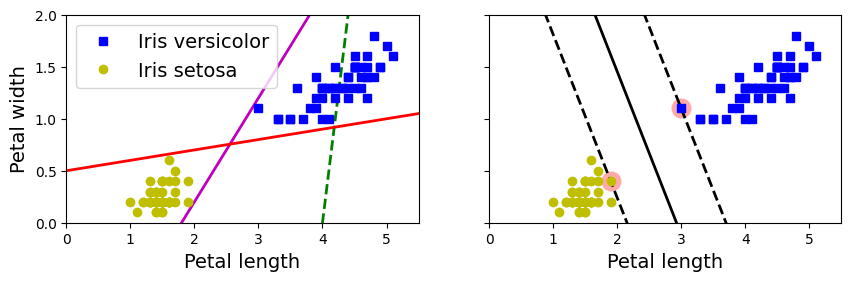

In [2]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# Clasificador Lineal SVM
---
Se puede pensar a un  clasificador SVM como lograr entrenar el más ancho camino entre dos clases. Esto se llama ***large margin classification***.

El límite de decisión está totalemnte determinado (soportado) por las instancias alojadas en el borde. Estas instancias son llamadas *vectores de soporte*. Estos bordes es observan en la imagen de arriba a la derecha.

Los SVMs son sensibles a las escalas de las características. En la imagen de abajo se observa la mejoría con los datos escalados.




(-2.0, 2.0, -2.0, 2.0)

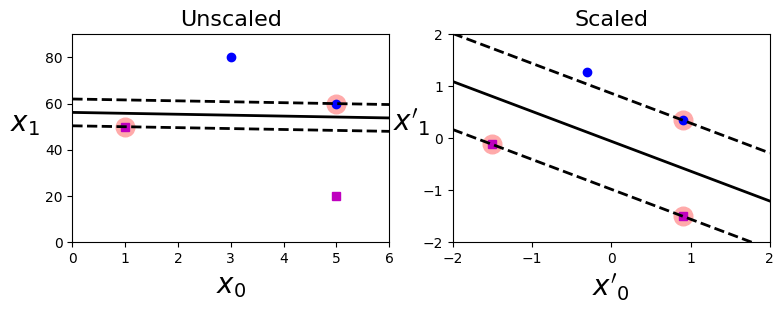

In [3]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## **Soft Margin Classification**

Si se impone estrictamente que todas las instancias deben de estar fuera de la calle y del lado derecho, esto se le conoce como ***hard margin classification***. Existen dos problemas principales con la *hard margin classification*. PRimeramente, solo funciona si los datos son linealmente separables, y segundo, es un poco sensitiva a las anomalías.

En la figura se abajo se muestra como con tan solo una anomalía adicional en la izquierda, es imposible encontrar un *hard margin*, y en el lado derecho el límite de decisión termina muy diferente del visto en la figura inicial.

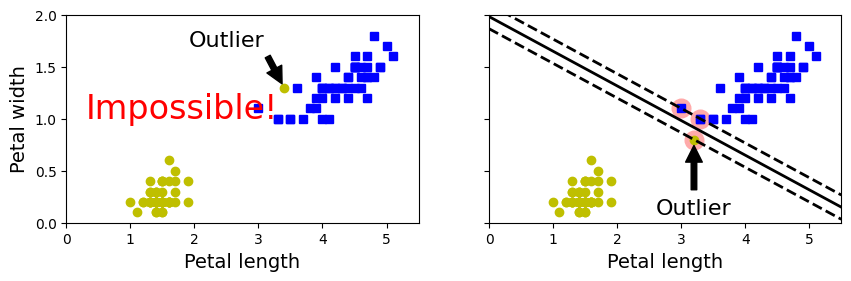

In [4]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

Para solucionar esto es preferible utilizar un modelo más flexible. El objetivo es encontrar un buen balance manteniendo la calle tan grande como se pueda y limitando las violaciones de margen (*margin violations*: instancias que terminan en medio de la calle o incluse en el lado incorrecto). A esto se le conoce como ***soft margin classification***.

En la clase **SVM** de Scikit-Learn se puede controlar este balance empleando el hiperparámetro **C**: un pequeño C vuelve la calle más ancha pero crear más violaciones de margen.

En la imagen de abajo, el primer clasificador trabaja mejor, porque hay menos predicciones erróneas, dado que la amyoría de las violaciones de margen están en el lado correcto del límite de decisión.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # Selecciona todas las filas de la columnas 2 y 3
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Distinto a los clasificadores de Regresión logística, los clasificadores SVM no retornan probabilidades para cada clase.

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

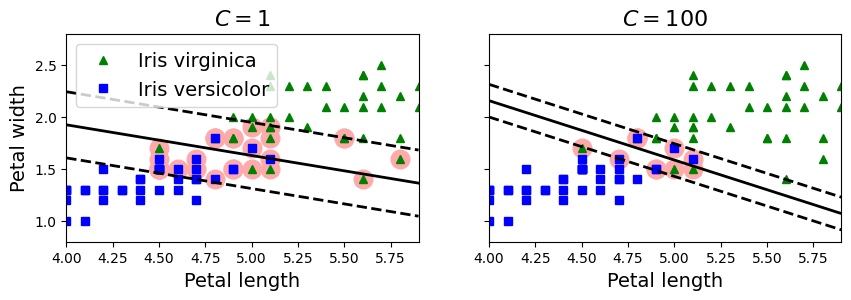

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

En la imagen de arriab, el primer clasificador trabaja mejor, porque hay menos predicciones erróneas, dado que la amyoría de las violaciones de margen están en el lado correcto del límite de decisión.

# Clasificador No Lineal SVM
---

Una forma de manejar datasets no lineales es añadir más características, como lo pueden ser características polinomiales. En algunos casos esto puede resultar en dataset linealmente seprable (como el de abajo).

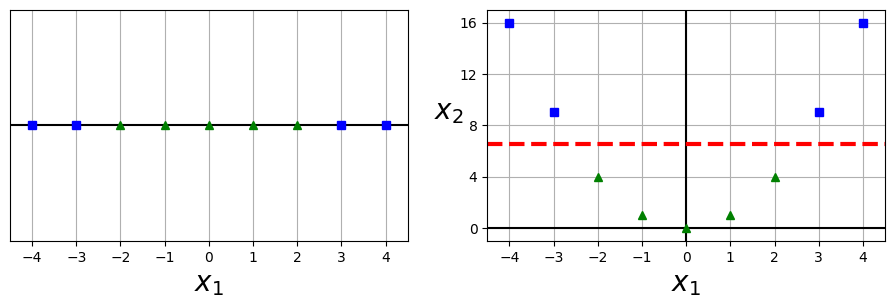

In [10]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

Para implementar esta idea utilizando Scikit-learn, se puede crear una Pipeline que contiene una PolynomialFeatures transformer, seguido de un StandarScaler u un LinearSVC.

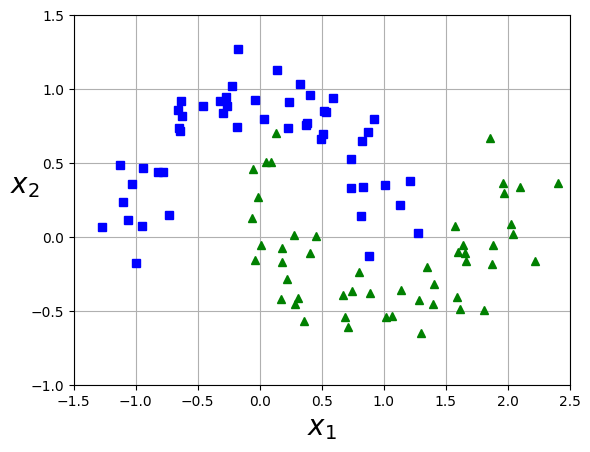

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

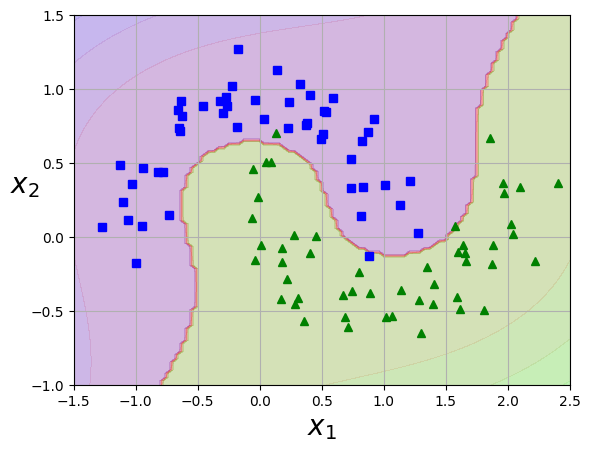

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## **Kernel Polinomial**

Añadir características polinomiales es simple y funciona con todos los tipos de algoritmos de Machine learning. Pero no puede lidiear con datasets muy complejos, y si se añade un alto grado polinomial, el modelo se vuelve muy lento.

Al trabajar con el modelo SVM se puede aplicar el ***kernel trick***. Puedes conseguir un rendimiento igual a que si se agregaran características polinomiales, ¡pero sin hacerlo!



In [14]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [15]:
poly100_kernel_svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

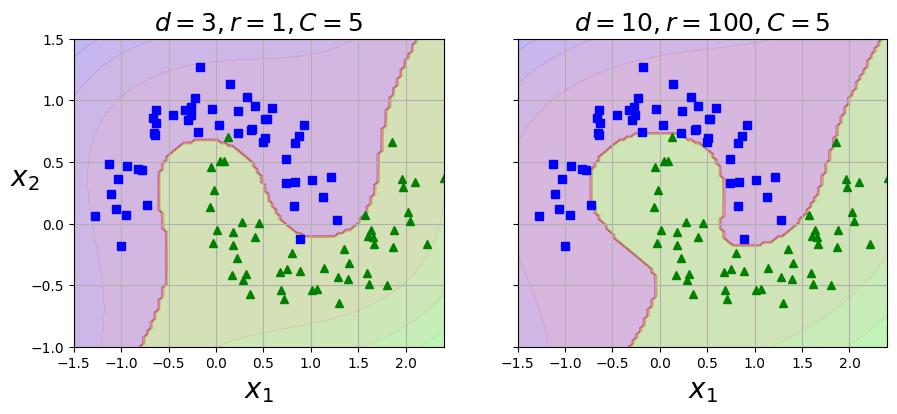

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

## **Agregar Características Similares**

Otra técnica para atacar problemas no lineales es agregar características calculadas utilizando un *función de similitud* que mide cuán parecida es una instancia a un punto de referencia (*landmark*).

*Gaussian RBF*

$$
\phi_{\gamma}(x, \ell) = \exp(-\gamma \| x - \ell \|^2)
$$


Es una ecuación de campana que varía desde 0 (muy lejos del *landmark*) a 1 (muy cerca del *landmark*).


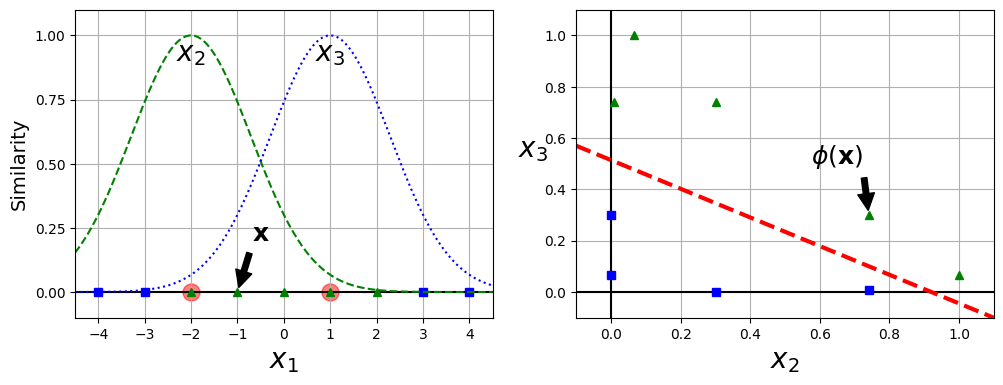

In [17]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

plt.show()

In [18]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


El lado malo es que si se tiene un dataset con *m* instancias y *n* características, se terminará con un dataset de *m* instancias y *m* características.

## **Gaussian RBF Kernel**
AL igual que con las características polinomiales, el método de **similarity function* puede ser utilizado con cualquier algoritmo de Machine Learning, pero puede ser computacionalmente costoso, especialmente en datasets largos.

Nuevamente el truco del kernel hace al SVM mágico: Es posible obtener resultados similares si se han añadido varias características similares, inclusive sin necesidad de añadirlas.

In [19]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

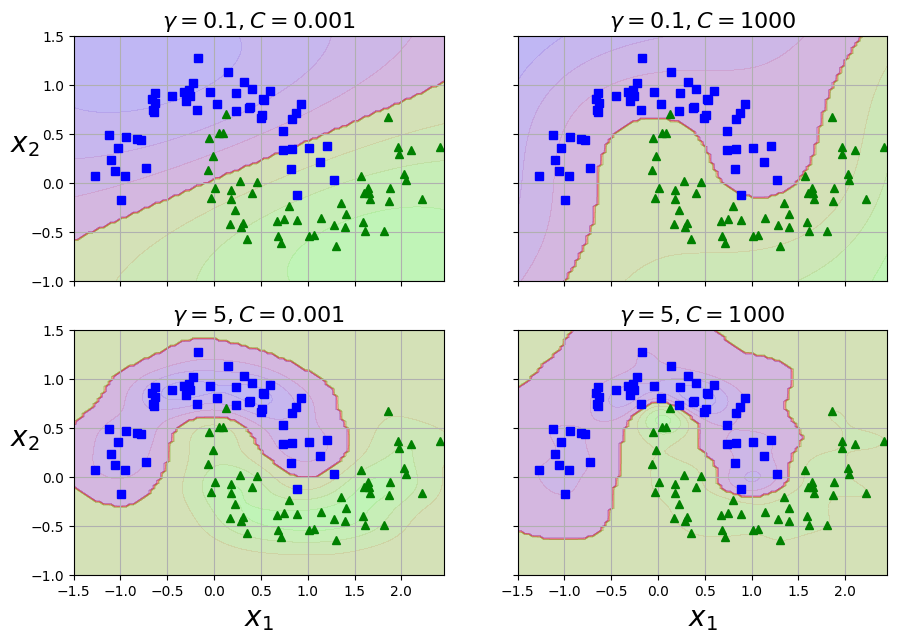

In [20]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

**Incrementar $\gamma$ --> La curva de campana es más estrecha. Es decir, el rango de influencia de cada instancia es menor: el límite de decisión termina siendo más irregular, moviéndose al rededor de instancias individuales.**

**Decrementar $\gamma$ --> Hace la curva de campana más amplia, así que las instancias tienen un rango de influencia más grande, y el límite de decisión es más limpio.**

# **Regresión SVM**
---

Los SVMs no solo soportan clasificación Lineal y no lineal, también soportan regresión lineal y no lineal.

La regresión con SVMs funciona de manera contraria a la clasificación: en lugar de tratar de encajar con la calle más ancha posible entre dos clases limitando los márgenes de violación, la **regresión SVM trata de hacer encajar tantas instancias como sea posible dentro de la calle mientras que limita los márgenes de violación (es decir, instancias fuera de la calle).** El ancho es controlado por el hiperparámetro $ϵ$.


In [21]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [22]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [23]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

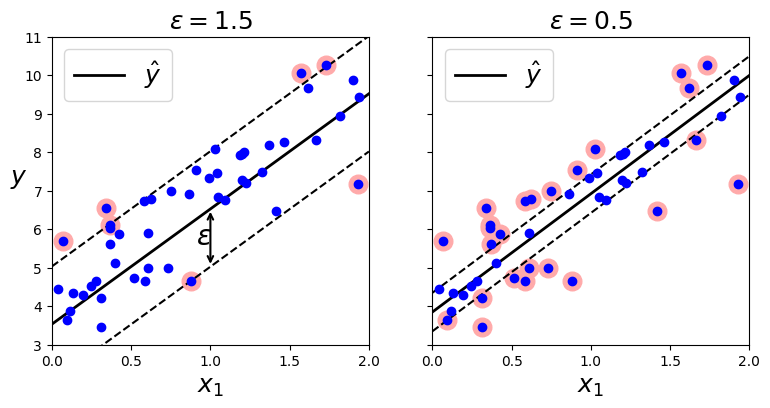

In [24]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

La imagen de arriba muestra un entrenamiento de una Regresión Lineal SVM con un margen grande ($ϵ=1.5$) y el otro con un margen pequeño ($ϵ=0.5$).

Añadir más instancias de entrenamiento dentro del margen no afecta la predicción del modelo, entonces se dice que el modelo ***es $ϵ$-insensitive.***


In [25]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [26]:

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [27]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

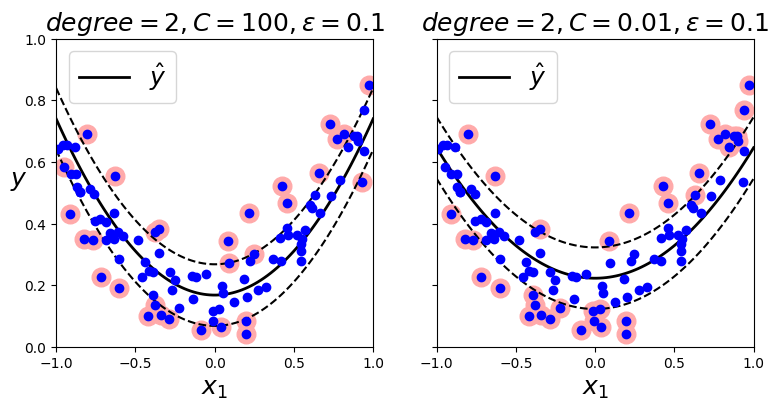

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

Para atacar la regresión no lineal, se puede utilizer un modelo SVM *kernelizado*. En la iamgen de arriba se aprecia un poca regularización en la izquierda y mucha regularización en la derecha (un valor pequeño de C).

```Al usar Scikit-Learn:```
* ```SVR class (soporta el kernel trick) --> Equivalente de Regresión de SVC class.```
* ```LinearSVR class --> Equivalente de Regresión de LinearSVC class.```

**La clase LinearSVR escala linealmente con el tamaño del set de entrenamiento (igual que LinearSVC), mientras que SVR es bastante más lento cuando el set de entrenamiento es grande (igual de SVC).**



# **¿Cómo funciona SVM?**
---
**Aquí se explicará a detalle cómo funcionan los SMVs.**

Se empleará la convención: el término bias será llamado *b* y el vector de pesos de características será llamado *w*. Ninguna característica de bias será añadida a la entrada de los vectores de cracterísticas.


# **SVMs Online**
El entrenamiento en línea quiere decir aprender incrementalmente, típicamente cuando instancias nuevas llegan.

Para clasificadores lineales SVM, un método es emplear GRadient Descent (ejem. utilizando SGDClassigier) para minimizar la función de pérdida. Lamentablemente converge más lento que el método basado en QP (*QUadratic Programming*).


# **EJERCICIOS**
---

**1. ¿Cuál es la idea fundamental detrás una *Support Vector Machine*?**

Lograr entrenar el calle más ancha posible entre las clases. Es decir, una clasificación *large margin*.

**2. ¿Qué es un vector de soporte?**

Las instancias localizadas en los bordes de la calle. Más bien, son las isntancias más cercanas al hiperplano de decisión, pero no necesariamente en el borde de la calle, y eliminarloos podrían alterar la posición del hiperplano de decisión. De ahí el nombre de vectores de sorporte: porque sostienen el hiperplano de decisión.

**3. ¿Por qué es importante escalar las entradas al usar SMVs?**

Para conseguir una calle más ancha. Emplear un escalamiento logra un mejor límite de decisión. El escalamiento asegura que todas las características contribuyan equitativamente al margen, lo que puede llevar a un mejor límite de decisión

**4. ¿Puede una salida de un clasificador SVM dar un porcentaje de confiabilidad cuando clasifica una instancia? ¿Qué hay de la probabilidad?**

Un clasificador por sí mismo no proporciona probabilidad directas de pertenencia a una clase. Sin embargo, es posible obtener estimaciones de probabilidad aplicando técnicas como la calibración de Platt a las salidas del SVM.

**5. ¿Se debería emplear la forma primal o dual del problema SVM para entrenar un modelo en un set con millones de instancias de entrenamiento y cientos de características?**

la formulación primal es más adecuada cuando hay más instancias que características. El problema dual es preferible cuando hay más características que instancias, porque permite el uso de kernels y puede ser computacionalmente más viable.

**6. Has entrenado un clasificador SVM con un kernel RBF. Parece haber sobreajustado el set de entrenamiento: ¿deberías incrementar o decrecer $\gamma$? ¿qué hay de C?**

Si el modelo está sobreajustado, se debería reducir $\gamma$. Ocurre lo mismo con el parámetro C.

**7. ¿Cómo se deberían de ajustar los parámetros QP (*F, f, A* y *b*) para resolver el problema de *soft margin* de un clasificador SVM usando un *of-the-shelf QP solver*?**

Para ajustar los parámetros del problema de soft margin en SVM utilizando un solver QP, necesitas modificar el vector *f* para incluir el término de regularización de la penalización C, y ajustar las matrices *A* y *b* para considerar las restricciones de margen suave. Esto implica adaptar el problema de optimización para que incorpore las violaciones del margen dentro del formalismo QP, permitiendo que algunos puntos estén en el lado incorrecto del margen o incluso del hiperplano de decisión, con una penalización proporcional a la distancia de la transgresión. Este ajuste es clave para manejar datos no linealmente separables y sobreajuste.





# **8. Entrenar un SVCLinear en un dataset linealmente separable. Luego entrenar un SVC y un SGDClassifier con el mismo dataset. Observar si se puede conseguir un modelo parecido.**



In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = iris["target"]

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [8]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1/(C*len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("Linear SVC:                  ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}): ".format(sgd_clf.alpha, sgd_clf.intercept_,sgd_clf.coef_))

Linear SVC:                   [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): 


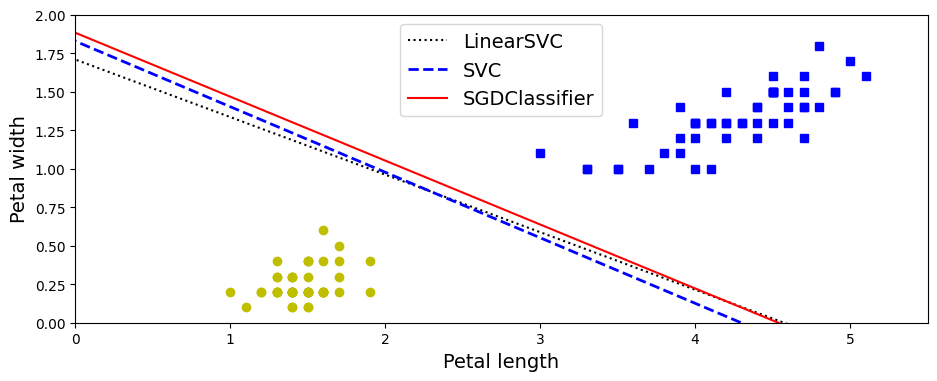

In [10]:
from matplotlib import pyplot as plt
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# **9. Entrenar un clasificador SVM con el dataset MNIST. Dado que los clasificadores SVM son clasificadores binarios, se requerirá usar *one-versus-all* para clasificar los 10 dígitos. Se tendrá que ajustar los hiperparámetros empleando una sets de validación pequeños para acelerar el procesos. ¿Qué accuracy se alcanzó?**

En primera, se cargará el dataset y se separará en Train y Test. Se peude emplear train_test_split(), pero las personas normlamente toman las primeras 60,000 instancias para set de entrenamiento y las últimas 10,000 instancias para set de test (esto hace posible comparar el rendimiento del modelo con el de otra persona).

**Nota:** Scikit-Learn devuelve un DataFrame de Pandas al usar fetch_openml(), así que se utilizará as_frame=False.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [3]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

Este accuracy en  MNIST es muy malo. El modelo lineal es ciertamente muy simple para MNIST, pero puede que solo se requiera escalar los datos.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [7]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [8]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

Ha mejorado, pero no es grandiosos para MNIST.

In [10]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [11]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

Esto es prometedor, porque se consiguió un mejor rendimiento con 6 veces menos datos.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=3.5012840682248028, gamma=0.07426979940358948; total time=   0.3s
[CV] END ....C=3.5012840682248028, gamma=0.07426979940358948; total time=   0.3s
[CV] END ....C=3.5012840682248028, gamma=0.07426979940358948; total time=   0.3s
[CV] END ...C=10.844164818218943, gamma=0.003981658812730265; total time=   0.3s
[CV] END ...C=10.844164818218943, gamma=0.003981658812730265; total time=   0.3s
[CV] END ...C=10.844164818218943, gamma=0.003981658812730265; total time=   0.3s
[CV] END ...C=1.0644938474958512, gamma=0.011844873123068592; total time=   0.3s
[CV] END ...C=1.0644938474958512, gamma=0.011844873123068592; total time=   0.3s
[CV] END ...C=1.0644938474958512, gamma=0.011844873123068592; total time=   0.3s
[CV] END ...C=5.5453900171021635, gamma=0.006092512978519458; total time=   0.3s
[CV] END ...C=5.5453900171021635, gamma=0.006092512978519458; total time=   0.3s
[CV] END ...C=5.5453900171021635, gamma=0.006092

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7811c807ab60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7811c8627400>},
                   verbose=2)

In [13]:
rnd_search_cv.best_estimator_

SVC(C=5.411748418752413, gamma=0.0031794425569604285)

In [14]:
rnd_search_cv.best_score_

0.8109786433139727

In [15]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.411748418752413, gamma=0.0031794425569604285)

In [16]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9998666666666667

In [17]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9631

Nada mal, pero aparentemente el modelo está un poco sobreajustado.

# **10. Entrenar un modelo de regresión SVM en el datasets de California housing**

In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [27]:
np.sqrt(mse)

0.9819256687727764

En este entrenamiento, los targets son 10 de cientos de dólares. El RMSE da una idea robusta del tipo de error que se debería esperar (con un peso más alto para errores más grandes): entonces, con este modelo podemos esperar errores al rededor de $10,000. No es bueno. Intentemos con kernel RBF.

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  16.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  15.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  14.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  15.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  15.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  15.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  14.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  13.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  14.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  13.4s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  14.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7811c518b280>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7811c5188550>},
                   random_state=42, verbose=2)

In [30]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643935)

In [31]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727456438057161

Luce bastante mejor que el modelo lineal. Se evaluará en el test set.

In [33]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

1.1066496747402408